In [648]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [649]:
cwd = os.getcwd()
path = os.path.join(cwd, 'data')

In [650]:
def read_csv_file(file_name, folder='data'):
    fp = os.path.join(cwd, folder, file_name)
    return pd.read_csv(fp)

In [651]:
train_df = read_csv_file('train.csv')
test_df = read_csv_file('test.csv')


In [652]:
train_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [653]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [654]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [655]:
train_df["Age"] = train_df["Age"].fillna(0)
test_df["Age"] = test_df["Age"].fillna(0)

In [656]:
def convert_gender(df):
    if df['Sex'].dtype == 'object':
        le = LabelEncoder()
        df['Sex'] = le.fit_transform(df['Sex']).astype('int64')
    return df

In [657]:
train_df = convert_gender(train_df)
test_df = convert_gender(test_df)

In [658]:
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,0.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [659]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [660]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<IPython.core.display.Javascript object>


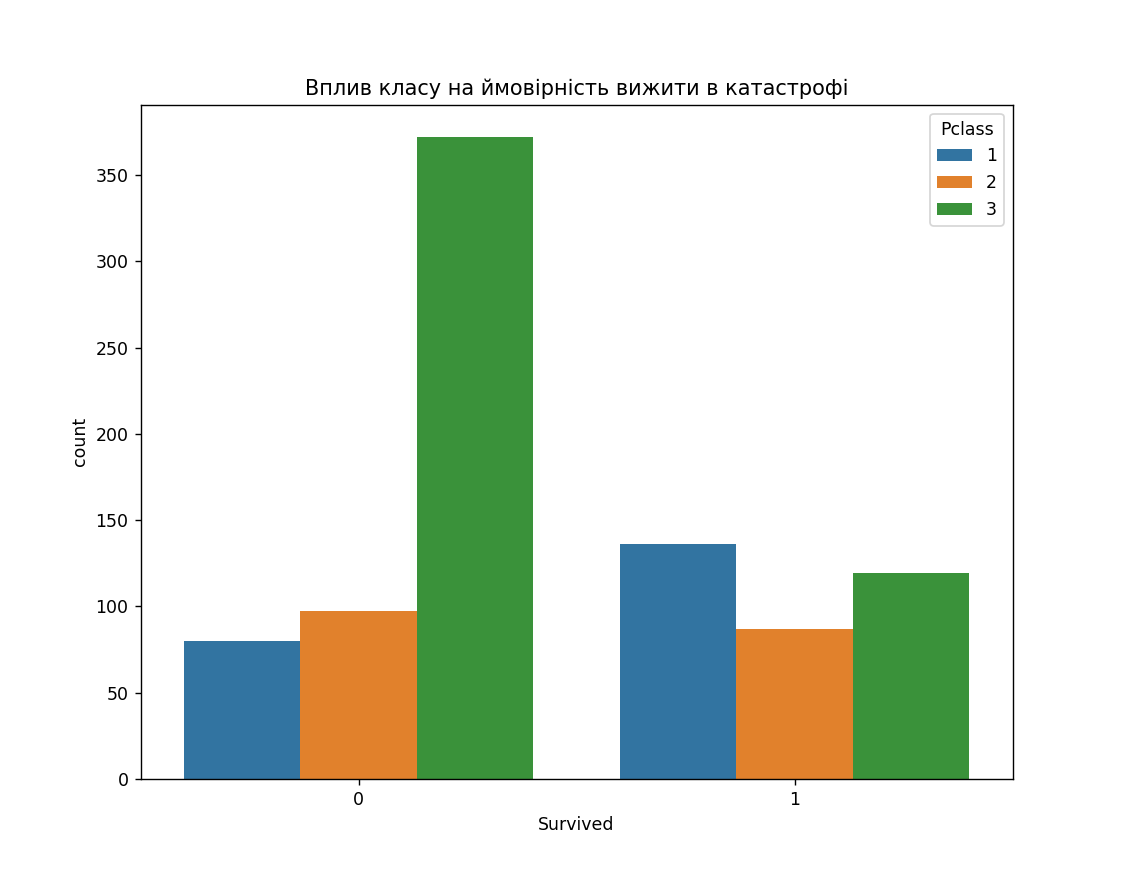

In [661]:
plt.figure(figsize=(9,7))
plt.title('Вплив класу на ймовірність вижити в катастрофі')
sns.countplot(data=train_df, x ='Survived', hue='Pclass');

<IPython.core.display.Javascript object>


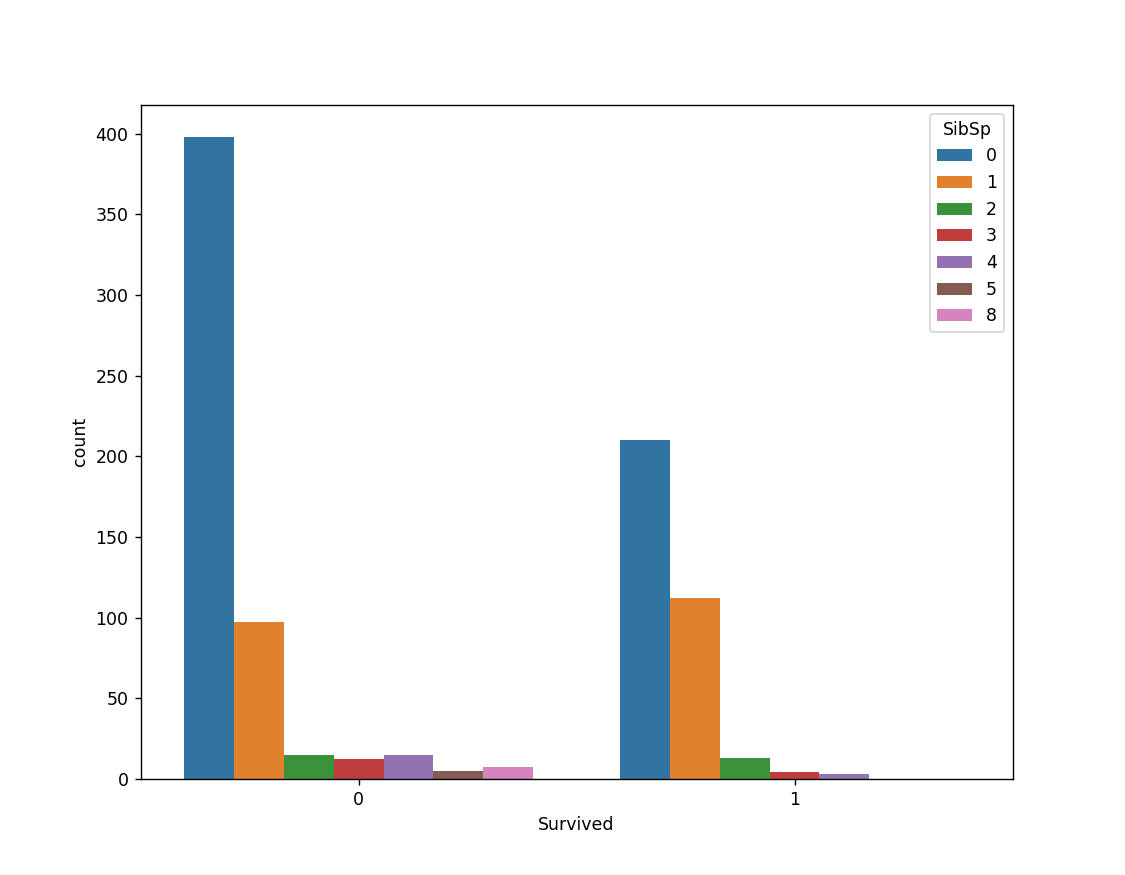

In [662]:
plt.figure(figsize=(9,7))
sns.countplot(data=train_df, x ='Survived', hue='SibSp');

<IPython.core.display.Javascript object>


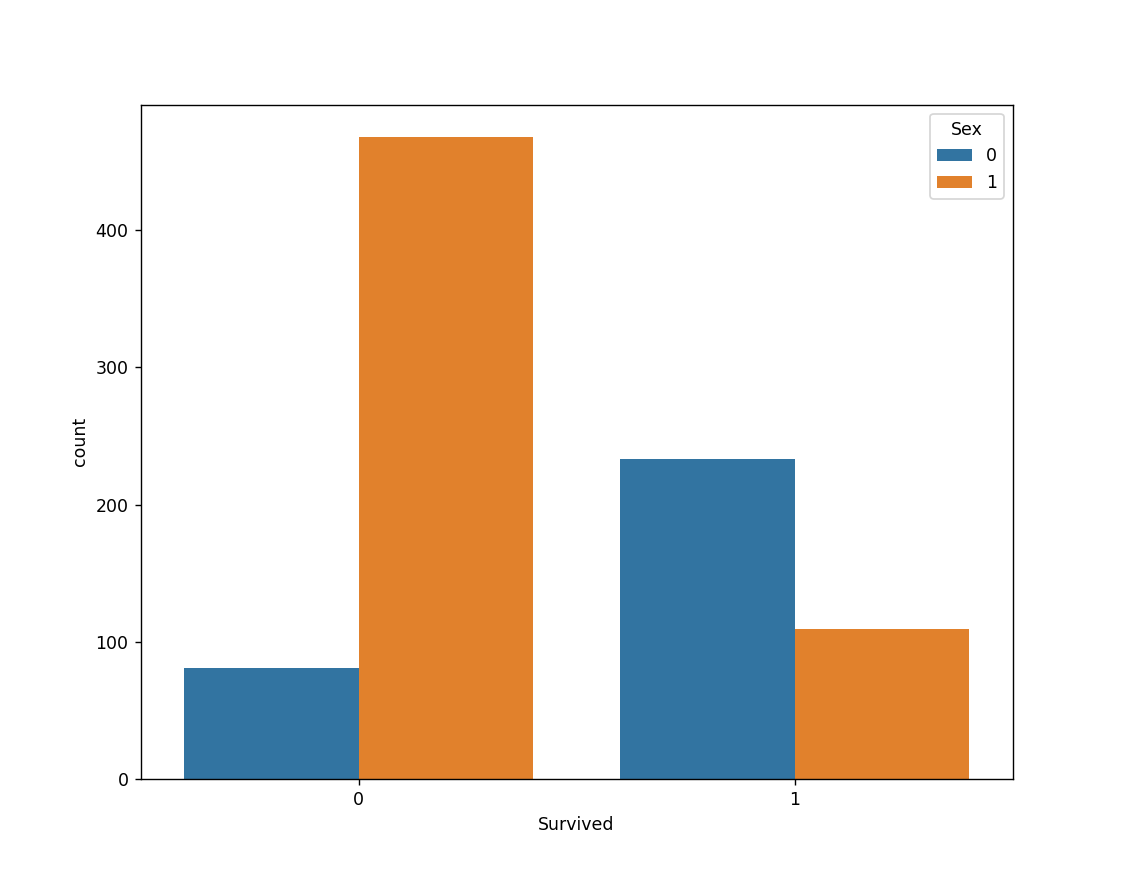

In [663]:
plt.figure(figsize=(9,7))
sns.countplot(data=train_df, x ='Survived', hue='Sex');

In [664]:
features = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
X = train_df[features]
y = train_df["Survived"]
X_test_df = test_df[features]

In [665]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [666]:
def run_GridSearchCV(clf,grid_values, X_train, X_test, y_train, y_test= None):
    grid_clf = GridSearchCV(clf, param_grid=grid_values,scoring='f1')
    grid_clf.fit(X_train, y_train)
    print('Grid best parameter (max f1 ): ', grid_clf.best_params_) 
    print('Grid best score (f1): ', grid_clf.best_score_) 

    if not y_test is None:
        test_score= grid_clf.score(X_test, y_test)
        print("test f1= {}".format(test_score))

In [667]:
def run_all_classifiers(X_train, X_test, y_train, y_test=None, list_classifiers= None):
    if list_classifiers is None or 'LogisticRegression' in list_classifiers:
        print ('\nLogisticRegression.')
        clf = LogisticRegression(max_iter=10000)
        grid_values = {'C': [0.005, 0.01,0.1, 1, 100, 10000, 100000]}
        run_GridSearchCV(clf,grid_values, X_train,X_test,  y_train,  y_test= y_test)

    if list_classifiers is None or 'DecisionTreeClassifier' in list_classifiers:
        print ('\nDecisionTreeClassifier')
        clf = DecisionTreeClassifier()       
        grid_values = {'max_depth': [2,5,7, 20, 50]}
        run_GridSearchCV(clf,grid_values, X_train, X_test, y_train,  y_test= y_test)   

    if list_classifiers is None or 'NB' in list_classifiers:
        print ('\nNB')
        clf =  GaussianNB().fit(X_train, y_train)
        train_f1 = f1_score(y_train, clf.predict(X_train))
        print("train set f1= {}".format(train_f1))
        if not y_test is None:
            test_f1 = f1_score(y_test, clf.predict(X_test))
            print("train set f1= {}".format(test_f1))

    if list_classifiers is None or 'GradientBoostingClassifier' in list_classifiers:
        print ('\nGradientBoostingClassifier.')
        clf = GradientBoostingClassifier() # learning_rate = 0.03)       
        grid_values = {'max_depth': [3,5,7]}
        run_GridSearchCV(clf,grid_values, X_train,X_test, y_train,  y_test= y_test)   

    if list_classifiers is None or 'xgboost' in list_classifiers:
        print ('\nxgboost.')
        clf = XGBClassifier().fit(X_train, y_train)
        y_predicted = clf.predict(X_test)
        print ('f1_score  = {:.2}'.format(f1_score(y_test, y_predicted)))

In [668]:
list_classifiers= [
    'LogisticRegression',
    'DecisionTreeClassifier',
    'NB',
    'GradientBoostingClassifier', 
    'xgboost', 
]
run_all_classifiers(X_train, X_test, y_train, y_test, list_classifiers= list_classifiers)


LogisticRegression.
Grid best parameter (max f1 ):  {'C': 1}
Grid best score (f1):  0.7166061141271108
test f1= 0.7244094488188977

DecisionTreeClassifier
Grid best parameter (max f1 ):  {'max_depth': 7}
Grid best score (f1):  0.7078209343531879
test f1= 0.7611940298507462

NB
train set f1= 0.7128378378378377
train set f1= 0.7651006711409395

GradientBoostingClassifier.
Grid best parameter (max f1 ):  {'max_depth': 5}
Grid best score (f1):  0.7312078235446762
test f1= 0.765625

xgboost.
f1_score  = 0.7


In [669]:
model = RandomForestClassifier(random_state=69)
params_grid = {'n_estimators': np.arange(1,100,10),
               "max_depth": np.arange(1,50,5)
              }
model_clf = GridSearchCV(clf, params_grid)
model_clf.fit(X_train, y_train)
print(f"Model best parameter: {model_clf.best_params_}")
print(f"Model best score: {model_clf.best_score_}")


Model best parameter: {'max_depth': 6, 'n_estimators': 41}
Model best score: 0.823096621688171


In [670]:
def generate_predictions(X_train, y_train, X_test_df, test_df):
    model = RandomForestClassifier(random_state=69, max_depth=6, n_estimators=41)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)

    predictions = model.predict(X_test_df)
    output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})

    output.to_csv("output.csv", index=False)

    return output

output_predictions = generate_predictions(X_train, y_train, X_test_df, test_df)

In [671]:
accuracy

0.8100558659217877

In [672]:
output_predictions

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [673]:
#kaggl Score: 0.77751